In [3]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [4]:
stop_words = set(stopwords.words("english"))

In [5]:
def clean_abstract(abstract):
    '''Clean the text, with the option to remove stopwords'''
    
    # Convert words to lower case and split them
    abstract = abstract.lower()
    # Clean the text
    abstract = re.sub(r"<br />", " ", abstract)
    abstract = re.sub(r"[^a-z]", " ", abstract)
    abstract = re.sub(r"   ", " ", abstract) # Remove any extra spaces
    abstract = re.sub(r"  ", " ", abstract)
    #remove stopwords
    stops = set(stopwords.words("english"))
    tokenized = word_tokenize(abstract)
    abstract = [w for w in tokenized if not w in stop_words and len(w) > 3]
    abstract = " ".join(abstract)

    # Return a list of words
    return abstract

In [7]:
#extracting abstracts and corresponding paper ids from json data
abstracts=[]
paper_ids=[]
count=0
for file in os.listdir("noncomm_use_subset") :
    with open('noncomm_use_subset/' + file) as json_data:
        data=json.load(json_data)
        l=data['abstract']
        if len(l) >= 1 :
            count+=1
            abstract=""
            paper_ids.append(data['paper_id'])
            for d in l :
                abstract+=d["text"]+" "
            abstract= clean_abstract(abstract)
            abstracts.append(abstract)

In [8]:
data=pd.DataFrame()
data['paper_id']=paper_ids
data['abstract']=abstracts

In [9]:
data

,paper_id,abstract
0,0036b28fddf7e93da0970303672934ea2f9944e7,blautia significantly decreased hiranonis blau...
1,005c43980edf3fcc2a4d12ee7ad630ddb651ce6e,accurate rapid diagnosis highly pathogenic avi...
2,00676f1131e03ca8defe523e79bc1635cc933909,high percentage dromedary camels middle east w...
3,006be99e337c84b8758591a54f0362353b24dfde,protein reactive protein crpt varies markedly ...
4,0134717f1b5ea99fc7e5ac305d492f5cedc8cd92,study toxicity antimalarial drug chloroquine c...
...,...,...
1699,ff5a79ed22ea416e6d89caad1cf0d83dbc741a4b,even though coronavirus infection humans norma...
1700,ff6d57f2aad99be129432058665b361dc18747e8,extensive evidence cultured macrophages geneti...
1701,ff83907653a4c4500e8c509ca28169e924742b40,combined vivo vitro approaches investigate fun...
1702,ffe718db1820f27bf274e3fc519ab78e450de288,provide experimental evidence replication enha...


In [10]:
def create_document_matrix(max_features,max_df) :
    '''
    Input - max_features to keep and maximum document frequency
    Output - trained vectorizer object and matrix
    '''
    ##start code here
    vectorizer = TfidfVectorizer(max_features=max_features, max_df=max_df)
    vectorizer.fit(data.abstract)
    X = vectorizer.transform(data.abstract)
    
    return vectorizer, X.toarray()
    ##end code here

In [13]:
vectorizer,doc_matrix=create_document_matrix(1000,0.4)
print(doc_matrix.shape)

(1704, 1000)


In [14]:
len(vectorizer.get_feature_names())

C:\Users\Zain\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1000

In [15]:
feature_list = vectorizer.get_feature_names()

In [16]:
feature_df = pd.DataFrame(data=doc_matrix, columns=feature_list)

In [17]:
feature_df

,abbreviations,ability,able,absence,access,according,accurate,acid,acids,acquired,...,world,worldwide,would,year,years,yeast,young,zika,zikv,zoonotic
0,0.0,0.000000,0.0,0.0,0.0,0.039757,0.00000,0.106998,0.013862,0.0,...,0.0,0.00000,0.0,0.0,0.010162,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.24074,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.066261,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.10293,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1700,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1701,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.117153,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1702,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
def visualize_clusters(cluster_column) :
    '''
    Input - column in all_data dataframe which contains cluster no. for the observations
    '''
     ##start code here
    for_x = all_data['pc1']
    for_y = all_data['pc2']
    sns.scatterplot(x=for_x, y=for_y, hue=cluster_column, 
                data=all_data, s=20);
    plt.legend(loc='lower right');
    ##end code here

In [22]:
KMeans(2).fit(feature_df).predict(feature_df)

C:\Users\Zain\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1])

In [23]:
def do_kmeans(n_clusters) :
    '''
    Input - no. of clusters
    Output - clusting object after fitting on the data
    '''
     ##start code here
    kmeans = KMeans(n_clusters=n_clusters).fit(feature_df)
    return kmeans
    ##end code here

In [24]:
clustering2=do_kmeans(2)

C:\Users\Zain\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [27]:
all_data=feature_df.copy()


In [28]:
all_data

,abbreviations,ability,able,absence,access,according,accurate,acid,acids,acquired,...,world,worldwide,would,year,years,yeast,young,zika,zikv,zoonotic
0,0.0,0.000000,0.0,0.0,0.0,0.039757,0.00000,0.106998,0.013862,0.0,...,0.0,0.00000,0.0,0.0,0.010162,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.24074,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.066261,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.10293,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1700,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1701,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.117153,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1702,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [29]:
def do_pca(n_components) :
    '''
    Input - the no. of components after doing pca
    '''
     ##start code here
        
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(all_data)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    
    return principalDf
    ##end code here

In [30]:
principalDf = do_pca(2)
all_data = pd.concat([ all_data , principalDf], axis = 1)
print(all_data.shape)

(1704, 1002)


In [31]:
all_data

,abbreviations,ability,able,absence,access,according,accurate,acid,acids,acquired,...,would,year,years,yeast,young,zika,zikv,zoonotic,pc1,pc2
0,0.0,0.000000,0.0,0.0,0.0,0.039757,0.00000,0.106998,0.013862,0.0,...,0.0,0.0,0.010162,0.0,0.0,0.0,0.0,0.0,0.055653,-0.181368
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.24074,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.089795,-0.137324
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.355380,0.507006
3,0.0,0.066261,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.152365,0.042344
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.013676,-0.099670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.173407,0.036724
1700,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.106027,0.029965
1701,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.117153,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.175513,0.169831
1702,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.102634,0.044865


In [33]:
all_data['cluster2']=list(clustering2.labels_)

In [34]:
all_data

,abbreviations,ability,able,absence,access,according,accurate,acid,acids,acquired,...,year,years,yeast,young,zika,zikv,zoonotic,pc1,pc2,cluster2
0,0.0,0.000000,0.0,0.0,0.0,0.039757,0.00000,0.106998,0.013862,0.0,...,0.0,0.010162,0.0,0.0,0.0,0.0,0.0,0.055653,-0.181368,0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.24074,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.089795,-0.137324,0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.355380,0.507006,0
3,0.0,0.066261,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.152365,0.042344,1
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.013676,-0.099670,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.173407,0.036724,0
1700,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.106027,0.029965,1
1701,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.117153,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.175513,0.169831,1
1702,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.102634,0.044865,1


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

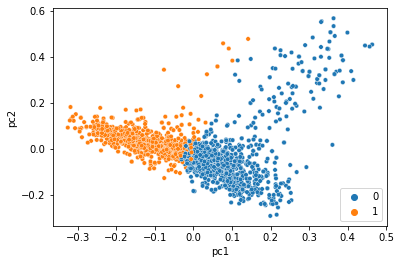

In [39]:
visualize_clusters("cluster2")

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
text_data = np.array(['I love Brazil. Brazil!',
                      'Sweden is best',
                      'Germany beats both'])

In [67]:
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)

tfidf.get_feature_names()

['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love', 'sweden']

In [68]:
# Show tf-idf feature matrix
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

In [69]:
pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())

,beats,best,both,brazil,germany,is,love,sweden
0,0.00000,0.00000,0.00000,0.894427,0.00000,0.00000,0.447214,0.00000
1,0.00000,0.57735,0.00000,0.000000,0.00000,0.57735,0.000000,0.57735
2,0.57735,0.00000,0.57735,0.000000,0.57735,0.00000,0.000000,0.00000
